In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import gridspec
import seaborn as sns
import subprocess
import cooler
import warnings
warnings.filterwarnings('ignore')

## Load and normalise data

In [ ]:
raw_counts_4c = pd.read_csv('/DATA/users/magnitov/znf143/4c/fragment_counts_all_viewpoints.tsv')
raw_counts_4c.head()

norm_counts_4c = raw_counts_4c
for column in norm_counts_4c.columns[3:]:
    s = sum(norm_counts_4c[column])/1000000
    norm_counts_4c[column] = norm_counts_4c[column]/s

In [ ]:
norm_counts_4c.to_csv('/DATA/users/magnitov/znf143/geo/4c/4c_normalised_counts_per_fragment.tsv', index = 0, header = 1, sep = '\t')

## Merge replicates

In [2]:
norm_counts_4c = pd.read_csv('4c_normalised_counts_per_fragment.tsv', sep = '\t')
norm_counts_4c.head()

,chr,start,end,4C_DMSO_rep1.Cldn1,4C_DMSO_rep1.Cpox,4C_DMSO_rep1.Prmt6,4C_DMSO_rep1.Rbm41,4C_DMSO_rep1.Sik1,4C_DMSO_rep1.Zfp108,4C_DMSO_rep1.Zfp111,...,4C_dTAG_6H_rep1.Sik1,4C_dTAG_6H_rep1.Zfp108,4C_dTAG_6H_rep1.Zfp111,4C_dTAG_6H_rep2.Cldn1,4C_dTAG_6H_rep2.Cpox,4C_dTAG_6H_rep2.Prmt6,4C_dTAG_6H_rep2.Rbm41,4C_dTAG_6H_rep2.Sik1,4C_dTAG_6H_rep2.Zfp108,4C_dTAG_6H_rep2.Zfp111
0,chr1,3000191,3000212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr1,3000363,3000816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr1,3000813,3000927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,3000924,3001051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.809083,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr1,3003413,3003460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
primers_data = pd.read_csv('primers.txt', sep = '\t')

viewpoints = {}
for region in np.unique(primers_data['vp_name'].values):
    vp_data = primers_data[primers_data['vp_name'] == region]
    viewpoints[region] = [vp_data['chrom'].values[0], np.min(vp_data[['start', 'end']].values), np.max(vp_data[['start', 'end']].values)]
viewpoints

{'Cldn1': ['chr16', 58728310, 58728567],
 'Cpox': ['chr16', 58671885, 58672716],
 'Prmt6': ['chr3', 110250887, 110251179],
 'Rbm41': ['chrX', 139997017, 139998029],
 'Sik1': ['chr17', 31856293, 31857114],
 'Zfp108': ['chr7', 24254163, 24254594],
 'Zfp111': ['chr7', 24207673, 24208002]}

In [4]:
for v in list(viewpoints.keys()):
    norm_counts_4c[v + '_DMSO'] = (norm_counts_4c['4C_DMSO_rep1.' + v] + norm_counts_4c['4C_DMSO_rep2.' + v])/2
    norm_counts_4c[v + '_dTAG'] = (norm_counts_4c['4C_dTAG_6H_rep1.' + v] + norm_counts_4c['4C_dTAG_6H_rep2.' + v])/2
norm_counts_4c.head()

,chr,start,end,4C_DMSO_rep1.Cldn1,4C_DMSO_rep1.Cpox,4C_DMSO_rep1.Prmt6,4C_DMSO_rep1.Rbm41,4C_DMSO_rep1.Sik1,4C_DMSO_rep1.Zfp108,4C_DMSO_rep1.Zfp111,...,Prmt6_DMSO,Prmt6_dTAG,Rbm41_DMSO,Rbm41_dTAG,Sik1_DMSO,Sik1_dTAG,Zfp108_DMSO,Zfp108_dTAG,Zfp111_DMSO,Zfp111_dTAG
0,chr1,3000191,3000212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,chr1,3000363,3000816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,chr1,3000813,3000927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,chr1,3000924,3001051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.404542
4,chr1,3003413,3003460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Plot 4C profiles

In [5]:
def extract_and_smooth_viewpoint(vp_name, viewpoints, norm_counts_4c, resolution, window):
    plot_4c = norm_counts_4c[norm_counts_4c['chr'] == viewpoints[vp_name][0]]
    plot_4c = plot_4c[['chr', 'start', 'end'] + [x for x in plot_4c.columns if vp_name in x]]
    plot_4c = plot_4c[(plot_4c['start'] > (viewpoints[vp_name][1] - window)//resolution*resolution) &
                      (plot_4c['end'] < (viewpoints[vp_name][2] + window)//resolution*resolution)]
    return(plot_4c)

chr16:58478000-58976000


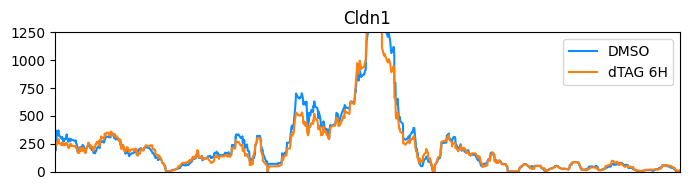

chr16:58420000-58920000


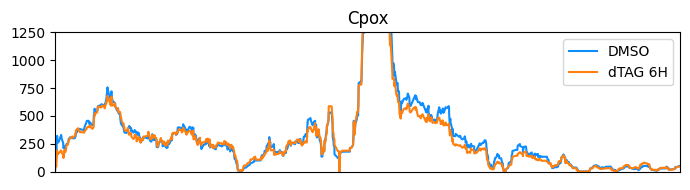

chr3:110000000-110498000


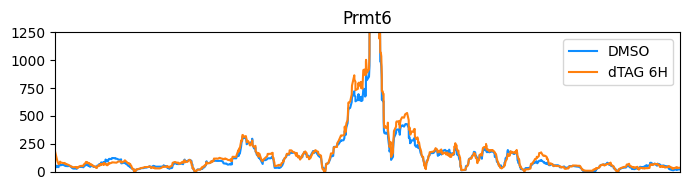

chrX:139746000-140246000


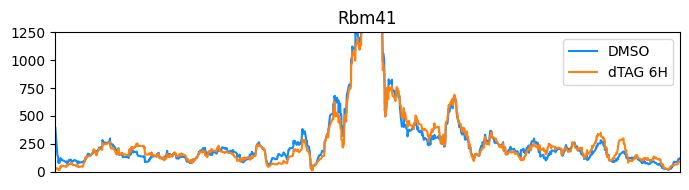

chr17:31606000-32102000


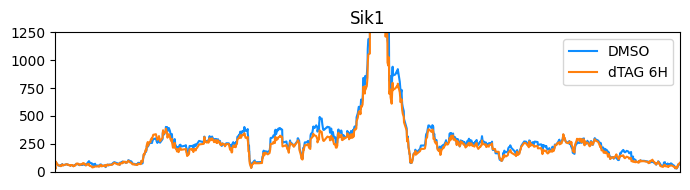

chr7:24004000-24500000


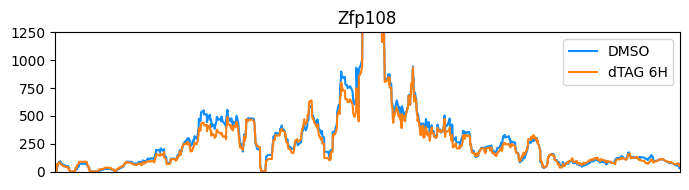

chr7:23956000-24456000


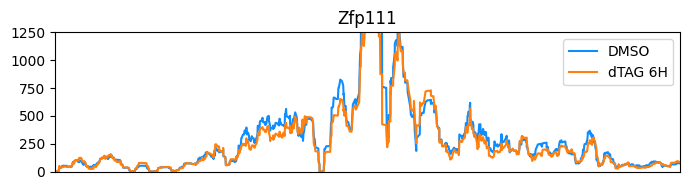

In [6]:
resolution = 2000

for v in list(viewpoints.keys()):
    p = extract_and_smooth_viewpoint(v, viewpoints, norm_counts_4c, resolution, 250000)
    print(p['chr'].values[0] + ':' + str(p['start'].values[0]//resolution*resolution) + '-' + str(p['start'].values[-1]//resolution*resolution))

    plt.figure(figsize = (7, 2))
    plt.title(v, fontsize = 12)
    plt.plot(p['start'], p[v + '_DMSO'].rolling(window = 21, min_periods = 1).mean(), c = '#0E8DFF', label = 'DMSO')
    plt.plot(p['start'], p[v + '_dTAG'].rolling(window = 21, min_periods = 1).mean(), c = '#FF800E', label = 'dTAG 6H')
    plt.xlim((p['start'].values[0]//resolution*resolution, p['start'].values[-1]//resolution*resolution))
    plt.xticks([], [])
    plt.ylim((0, 1250))
    plt.legend()

    plt.tight_layout()
    plt.show()

## Plot 4C profiles and Micro-C maps from Hsieh et al. (PMID: 32213323)

In [7]:
def extract_and_smooth_viewpoint(vp_name, viewpoints, norm_counts_4c):
    plot_4c = norm_counts_4c[norm_counts_4c['chr'] == viewpoints[vp_name][0]]
    plot_4c = plot_4c[['chr', 'start', 'end'] + [x for x in plot_4c.columns if vp_name in x]]
    plot_4c = plot_4c[(plot_4c['start'] > viewpoints[vp_name][1]) & (plot_4c['end'] < viewpoints[vp_name][2])]
    return(plot_4c)

In [8]:
def extract_matrix(vp_name, viewpoints):
    microc_map = cooler.Cooler('/DATA/users/magnitov/public_data/hsieh_2020.mESC_MicroC.mm10.mapq_30.200.mcool::resolutions/' + str(viewpoints[vp_name][3]))
    matrix = microc_map.matrix(balance=True, sparse=True).fetch((viewpoints[vp_name][0], viewpoints[vp_name][1], viewpoints[vp_name][2])).toarray()
    matrix = np.nan_to_num(matrix)
    return(matrix)

In [9]:
vp_zoom = {'Cldn1': ['chr16', 58400000, 58800000, 1000],
           'Cpox': ['chr16', 58400000, 58800000, 1000],
           'Zfp108': ['chr7', 24110000, 24350000, 600],
           'Zfp111': ['chr7', 24110000, 24350000, 600],
           'Prmt6': ['chr3', 110050000, 110350000, 600],
           'Rbm41': ['chrX', 139910000, 140150000, 600],
           'Sik1': ['chr17', 31630000, 31915000, 600]}

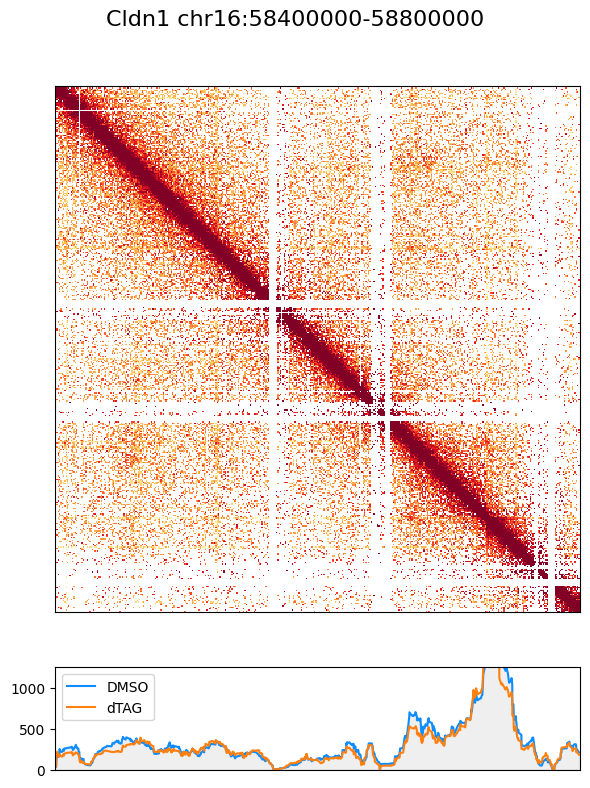

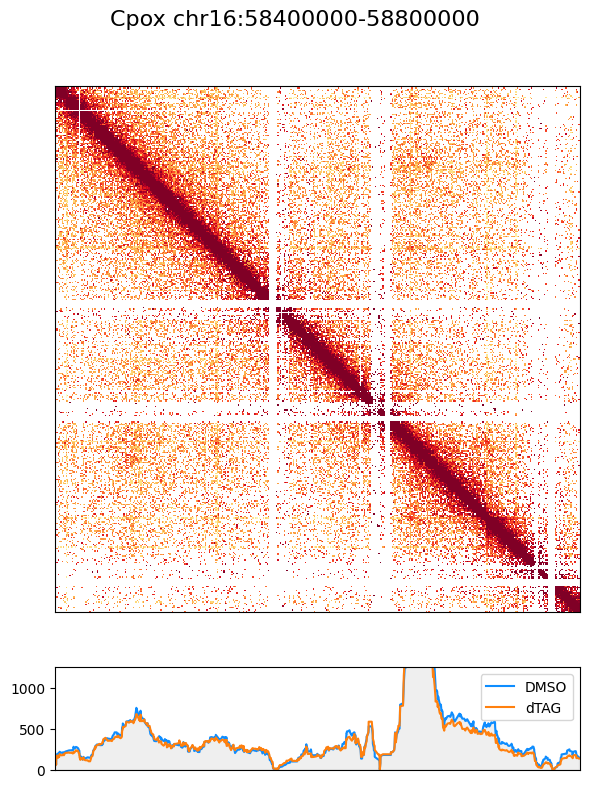

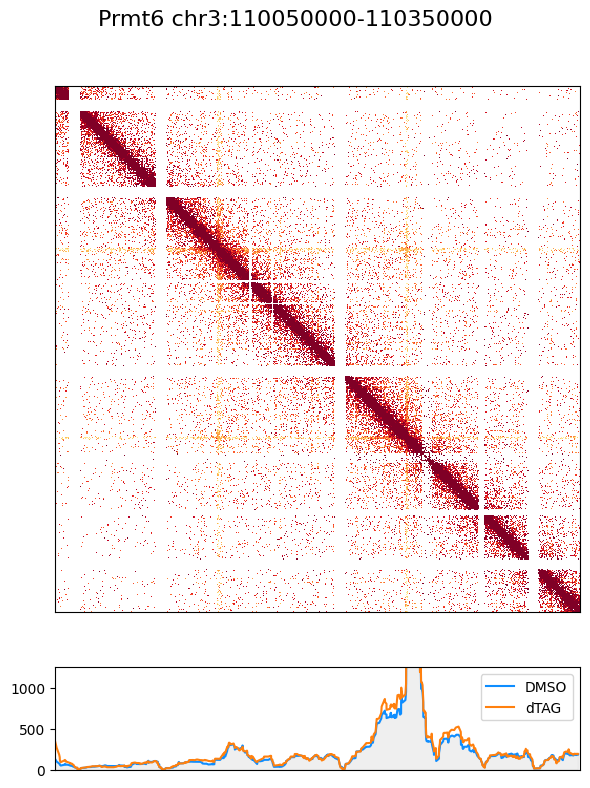

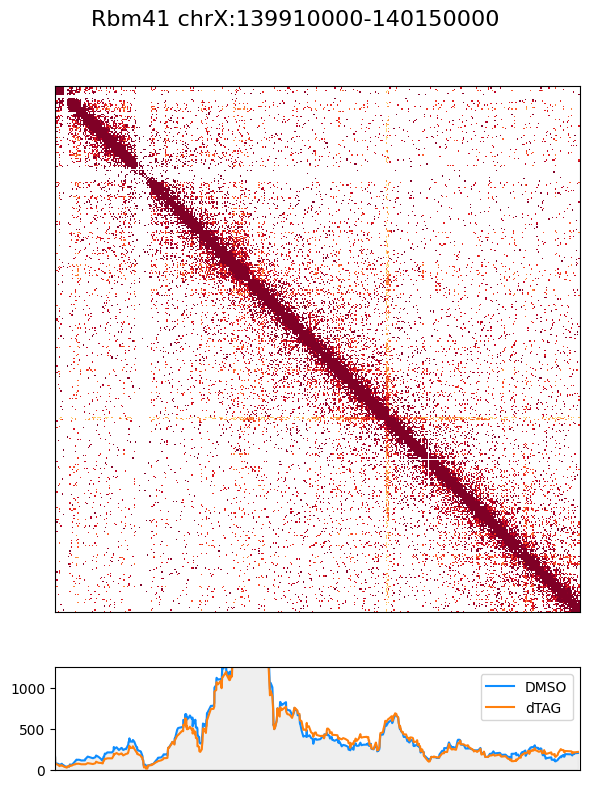

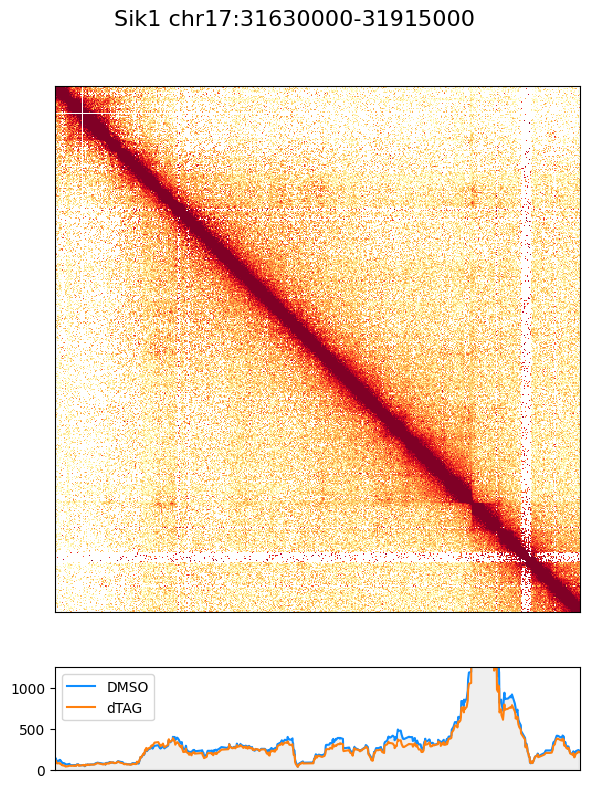

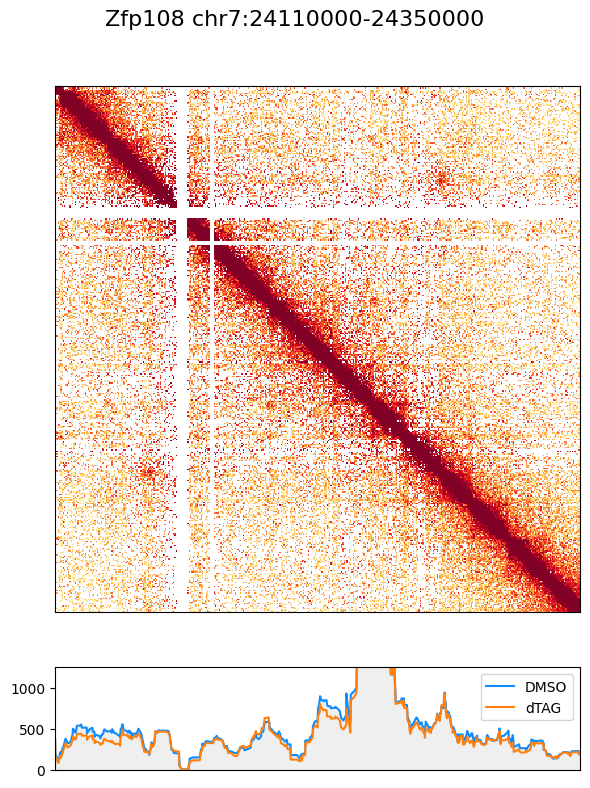

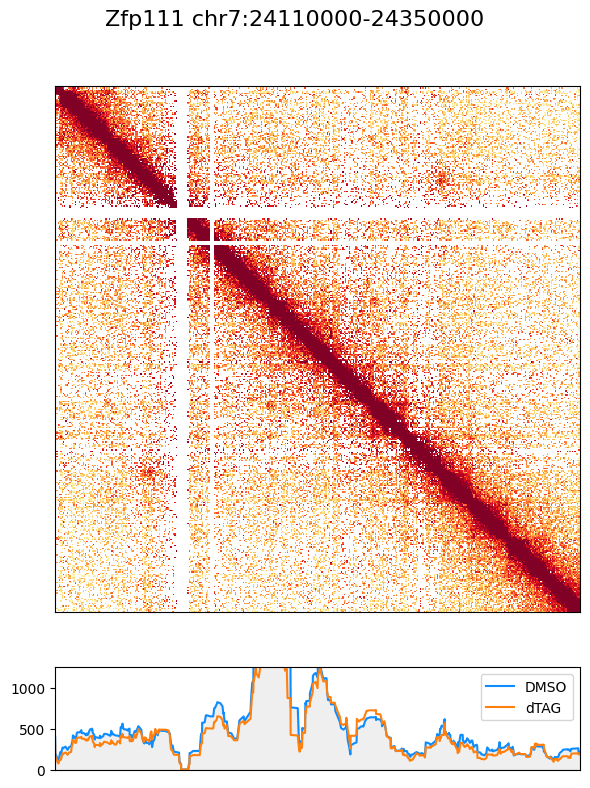

In [10]:
for v in list(viewpoints.keys()):
          
    fig = plt.figure(figsize = (6, 8))
    fig.suptitle(v + ' ' + vp_zoom[v][0] + ':' + str(vp_zoom[v][1]) + '-' + str(vp_zoom[v][2]), fontsize = 16)
    
    gs = gridspec.GridSpec(2, 1, height_ratios = (6, 1))
    
    ax1 = plt.subplot(gs[0])
    m = extract_matrix(v, vp_zoom)
    im = ax1.matshow(np.log2(m), cmap='YlOrRd', vmin = -12, vmax = -7)
    #plt.colorbar(im, shrink = 0.5)
    plt.xticks([], [])
    plt.yticks([], [])

    ax2 = plt.subplot(gs[1])
    p = extract_and_smooth_viewpoint(v, vp_zoom, norm_counts_4c)
    ax2.plot(p['start'], p[v + '_DMSO'].rolling(window = 21, min_periods = 1).mean(), c = '#0E8DFF', label = 'DMSO')
    ax2.fill_between(p['start'], p[v + '_DMSO'].rolling(window = 21, min_periods = 1).mean(), color = '#CCCCCC', alpha = 0.3)
    ax2.plot(p['start'], p[v + '_dTAG'].rolling(window = 21, min_periods = 1).mean(), c = '#FF800E', label = 'dTAG')
    plt.xlim((vp_zoom[v][1], vp_zoom[v][2]))
    plt.xticks([], [])
    plt.ylim((0, 1250))
    plt.legend()
    
    plt.tight_layout()
    plt.show()